In [1]:
import io
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
with open("/content/drive/MyDrive/Colab Notebooks/type_pred_desc_15_cls.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")


First line (header) looks like this:

"category","text"

Each data point looks like this:

bakeryandconfectionery,খিচুড়ি ডিম খিচুরি খিচুরি ডিম জমা টা পুরি পরাটা ডিম পুরি প্লেট ভাত টা ভর্তা ভাত মাছ মাছ ভাত মুড়িঘন্ট ভাত রুটি ডিম



In [3]:
NUM_WORDS = 500000
EMBEDDING_DIM = 16
MAXLEN = 20
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .85

In [4]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    pass

    return sentence


def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a CSV file
    
    Args:
        filename (string): path to the CSV file
    
    Returns:
        sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
    """
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentence = row[1]
            sentence = remove_stopwords(sentence)
            sentences.append(sentence)

    return sentences, labels

In [5]:
# Test the functions
sentences, labels = parse_data_from_file("/content/drive/MyDrive/Colab Notebooks/type_pred_desc_15_cls.csv")

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}")

There are 30500 sentences in the dataset.

First sentence has 23 words (after removing stopwords).

There are 30500 labels in the dataset.

The first 5 labels are ['bakeryandconfectionery', 'clothstore', 'electronics', 'mfsmobilerecharge', 'stationery']


In [6]:
# GRADED FUNCTIONS: train_val_split
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets
    
    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set
    
    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """
    
    ### START CODE HERE
    
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = round(len(sentences)*training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[0:train_size]
    train_labels = labels[0:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]
    
    ### END CODE HERE
    
    return train_sentences, validation_sentences, train_labels, validation_labels

In [7]:
# Test your function
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 25925 sentences for training.

There are 25925 labels for training.

There are 4575 sentences for validation.

There are 4575 labels for validation.


In [8]:
# GRADED FUNCTION: fit_tokenizer
def fit_tokenizer(train_sentences, num_words, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences
    
    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token
    
    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """
    
    ### START CODE HERE
    
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token=oov_token)
    
    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)
    
    ### END CODE HERE
    
    return tokenizer

In [9]:
# Test your function
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 44627 words

<OOV> token included in vocabulary


In [10]:
# GRADED FUNCTION: seq_and_pad
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    """
    Generates an array of token sequences and pads them to the same length
    
    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        maxlen (int): maximum length of the token sequence
    
    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """    
    ### START CODE HERE
       
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding=padding)
    
    ### END CODE HERE
    
    return padded_sequences

In [11]:
# Test your function
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (25925, 20)

Padded validation sequences have shape: (4575, 20)


In [12]:
# categories into numerics
categories=list()

In [13]:
# GRADED FUNCTION: tokenize_labels
def tokenize_labels(all_labels, split_labels):
    """
    Tokenizes the labels
    
    Args:
        all_labels (list of string): labels to generate the word-index from
        split_labels (list of string): labels to tokenize
    
    Returns:
        label_seq_np (array of int): tokenized labels
    """
    ### START CODE HERE
    
    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer = Tokenizer()
    
    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels)

    global categories
    categories = list(label_tokenizer.word_index)
    
    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels) 
    
    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_seq)-1
    
    ### END CODE HERE
    
    return label_seq_np

In [14]:
# Test your function
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

print("Labels are: ", categories)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

Labels are:  ['grocery', 'mfsmobilerecharge', 'pharmacy', 'distributororwholesale', 'electronics', 'clothstore', 'hardware', 'agriculture', 'bakeryandconfectionery', 'cosmetics', 'motorrepair', 'stationery', 'householdandfurniture', 'tailors', 'shoestore']
First 5 labels of the training set should look like this:
[[ 8]
 [ 5]
 [ 4]
 [ 1]
 [11]]

First 5 labels of the validation set should look like this:
[[3]
 [1]
 [5]
 [2]
 [2]]

Tokenized labels of the training set have shape: (25925, 1)

Tokenized labels of the validation set have shape: (4575, 1)



In [17]:
# GRADED FUNCTION: create_model
def create_model(num_words, embedding_dim, maxlen):
    """
    Creates a text classifier model
    
    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text classifier model
    """
    
    tf.random.set_seed(123)
    
    ### START CODE HERE
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(15, activation='softmax')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    ### END CODE HERE

    return model


In [18]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)

history = model.fit(train_padded_seq, train_label_seq, epochs=10, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/10
811/811 [==============================] - 71s 87ms/step - loss: 2.1463 - accuracy: 0.3207 - val_loss: 1.9313 - val_accuracy: 0.3917
Epoch 2/10
811/811 [==============================] - 69s 85ms/step - loss: 1.8530 - accuracy: 0.4247 - val_loss: 1.7989 - val_accuracy: 0.4457
Epoch 3/10
811/811 [==============================] - 69s 85ms/step - loss: 1.6913 - accuracy: 0.4836 - val_loss: 1.7325 - val_accuracy: 0.4734
Epoch 4/10
811/811 [==============================] - 69s 85ms/step - loss: 1.5643 - accuracy: 0.5259 - val_loss: 1.7028 - val_accuracy: 0.4852
Epoch 5/10
811/811 [==============================] - 69s 85ms/step - loss: 1.4489 - accuracy: 0.5659 - val_loss: 1.6904 - val_accuracy: 0.4936
Epoch 6/10
811/811 [==============================] - 69s 85ms/step - loss: 1.3388 - accuracy: 0.6023 - val_loss: 1.7077 - val_accuracy: 0.4938
Epoch 7/10
811/811 [==============================] - 69s 85ms/step - loss: 1.2374 - accuracy: 0.6349 - val_loss: 1.7370 - val_accuracy:

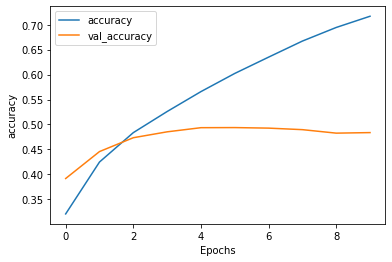

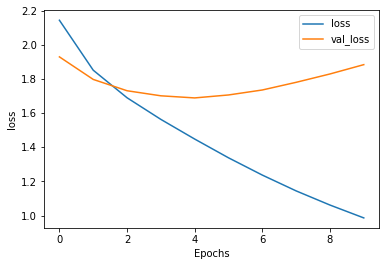

In [19]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
# probabilies against all classes for selective validation data
pred_probabilities=model.predict(val_padded_seq[0:100, :])

# predictions against selective validation data
pred_classes=[categories[item] for item in np.argmax(pred_probabilities, axis=1)]
val_shop_names=val_sentences[0:100]

for i in range(0, len(val_shop_names)): 
  print(val_shop_names[i]+ ": "+pred_classes[i])

print()

# if predictions match
print(np.argmax(pred_probabilities, axis=1)==(np.squeeze(val_label_seq[0:100])))

4/4 [==============================] - 0s 3ms/step
লাল রং কেজি: distributororwholesale
এজেণ্ট সিম হাজার নেওয়া এম বি বিকাশ এজেন্ট সিম নেওয়া সময় বিকাশে এজেন্ট সিম হানিফ কাউন্টার ভেতর নেওয়া: mfsmobilerecharge
জমা: mfsmobilerecharge
ই কার্তিক মাস বাংলা ইং মোট আসল মাসে সুদ সাক্কী জানে জয়দেব ইনজেকসন খরছ ওআর এস সুমন কাসের ও কমল কিরমোহন ওআর এস কেনোলা ছেলে ইন্ডিয়া পিল জাবার দিন গেস নাসিরনগর আওলাত কারেন্টের বিল জেটা জেটা জেডির ও জেটা পেট নামার ও দাদা দাদা ও আর এস দাদা কিমরানির ওপ দাদা টানের ও দাদাদ ও দাদা পিস বিস্টুট পেকেট দাদা বেতার ও পিন্টু পিসা পাওটার সিরাপ বাচ্চার ও পেয়ের ও বাচ্চার দাত বেতার ও জেডি বাবা ডাইরিয়া বাূতি বিড়ি বিশ্ব বিস্টুট বেতার ও বোদি বাচ্চার ও বৌদি আওলাত বৌদি আওলাত সহ বৌদি ক্মসের ও বৌদি বাচ্চাকে জ্বরের ও বৌ বাচ্চর জ্বরের ও ব্রাস নেওরা দিন মা পায়ে ও ছুট বাই মামা কুচরা মার ও বাবার ডায়রিয়ার সময় মেযে মার ও মোবাইলে মোবালে রন্ঞজন রাতে ও রুবেল মার ও কাসের শৈলেন্ড সুমন বিদেশ যাবার কতা বলে সুমন মার ও ম সুহেল সৃতির কাসের ও হরিপদ নিজে হিসাব টিক করে হরিপদ বুড়া সাসুড়ি পেট খারাপের ও: distri

In [22]:
# save model and architecture to single file
model.save("/content/drive/MyDrive/Colab Notebooks/desc_model_15_cls.h5")
print("Saved model to disk")

Saved model to disk
